# Practical 4: Regression Problems

## Machine Learning

By now you should have the basic skills required to code in Python, and libraries like pandas, numpy or seaborn should at least seem a little bit less freightening to you then at the beginning. For the machine learning applications in the coming weeks, we will be utilizing the same structured step-wise workflow every time we apply regression, classification or clustering. This workflow requires pandas, numpy and tools for visualization (seaborn/matplotlib), so importing these libraries should always be the first step after opening up spyder.

### Assignment 0: Start-up

Start up spyder, open up a new script for today's practical, and make sure the required dataset is in your current working directory. Import pandas, numpy, seaborn & matplotlib.pyplot

In [2]:
import platform
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

print(f"My Python version is: {platform.python_version()}")
print(f"My Numpy version is: {np.__version__}")
print(f"My Pandas version is: {pd.__version__}")
print(f"My Seaborn version is: {sns.__version__}")

My Python version is: 3.13.2
My Numpy version is: 2.2.3
My Pandas version is: 2.2.3
My Seaborn version is: 0.13.2


## Data exploration

### Assignment 1: inspect data

In the next step, import and inspect the data. Today we will be working with a dataset from EA Sports' FIFA '18 game. This dataset contains attributes from >17.000 players, webscraped from www.sofifa.com. 

The original dataset contains >120 features on every player, ranging from his transfer value to his signature celebration style after a goal. Later in the course some of you will be working with the full ('19) dataset for their project, yet at this point we prepared a simplified version for you. 

First, import the csv file named 'FIFA_18_basic' as a pandas dataframe and declare it to a variable named 'df'. Next, inspect df using the .head(), .tail(), .describe(), and .info() methods in the IPython console. 

In [4]:
path = os.getcwd()
file = 'FIFA_18_basic.csv'
df = pd.read_csv(os.path.join(path, file))
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17994 non-null  int64 
 1   full_name   17994 non-null  object
 2   pac         17994 non-null  int64 
 3   sho         17994 non-null  int64 
 4   pas         17994 non-null  int64 
 5   dri         17994 non-null  int64 
 6   def         17994 non-null  int64 
 7   phy         17994 non-null  int64 
 8   overall     17994 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ MB


,Unnamed: 0,pac,sho,pas,dri,def,phy,overall
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000
mean,8996.500000,67.739969,53.485217,57.531177,62.591308,49.404301,64.767033,66.253029
std,5194.564707,10.937646,13.833779,10.466810,10.377375,17.120189,9.657583,6.946729
min,0.000000,21.000000,14.000000,24.000000,24.000000,12.000000,27.000000,46.000000
25%,4498.250000,61.000000,44.000000,51.000000,57.000000,34.000000,58.000000,62.000000
50%,8996.500000,68.000000,56.000000,58.000000,64.000000,52.000000,66.000000,66.000000
75%,13494.750000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,71.000000
max,17993.000000,96.000000,93.000000,95.000000,96.000000,90.000000,92.000000,94.000000


Basic inspection of a dataframe should be a pretty easy task by now, and if you did this right you should be able to answer the following questions:

::::{important}
1. *What columns are in the df?* 

2. *What are the datatypes of the different variables*

3. *Is there any missing data we need to deal with?* 

4. *Are all variables measured on the same scale?*
::::

For today's task, you will build a regression model to predict 'overall' player rating scores based on the ratings on 6 different player attributes (you should be able to identify these attributes based on your inspection). 

### Assignment 2: EDA

Before doing any form of analysis, it is always a good thing to form an idea of what we are dealing with. Therefore, the next step is doing some Exploratory Data Analysis (EDA). Typically, EDA consists of visualizing distributions in histograms and correlations between variables in scatterplots. Doing so will give you a ton of information and will help you to form some hypothesis about a possible outcome of your model and what things to consider when choosing a certain model. 

First, visualize the distribution of the 'overall' player rating score by plotting a normalized histogram of these scores. Normalized histograms plot the bin-frequencies in percentages rather than in absolute numbers. 

One way to do this is by calling the .histplot() function from the *seaborn* library (imported as **sns**). As keyword arguments you will need the 'overall' column of the dataframe, and you will have to specify norm_hist=True. Don't worry about labels, titles or fancy colors, as this is not the goal of today's lesson. 

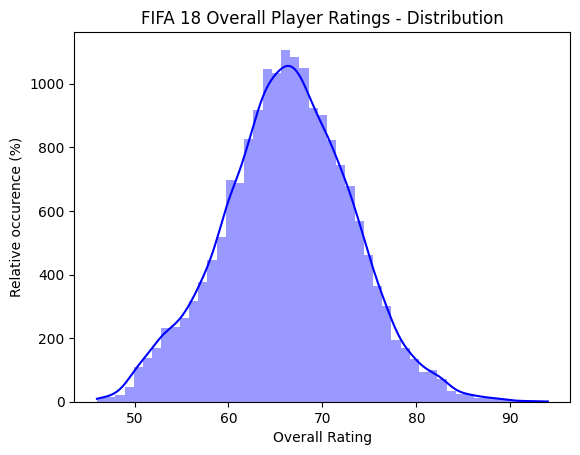

In [3]:
sns.histplot(df['overall'], color='blue', label='Overall Rating', edgecolor=None, alpha=0.4, kde=True, bins=49)
plt.title("FIFA 18 Overall Player Ratings - Distribution")
plt.ylabel('Relative occurence (%)')
plt.xlabel('Overall Rating')
plt.show()

It looks like our dependent (or outcome) variable 'Overall' is normally distributed and centers around a mean of 65. Did you find the same distribution? 

Next, we want to study the relationships between the different variables we will be using in our model. First of all because this helps us to form a hypothesis on what relations to expect between dependent and independent variables. Second of all because we want to know if there is co-linearity between independent variables. Having a high correlation between 2 or more indepedent variables could affect our model and therefore determines what model we should choose. 

You could obviously draw dozens off individual scatterplots, and although this is a great exercise to improve your plotting skills, it is also a major waste of time. You can do it all at once by calling the 'pairplot()' function in the *seaborn* library. The only keyword argument you always have to specify is the dataframe. However, in this case we do not want to plot that weird first column called 'Unnamed: 0', so we will also specify 'vars'. 'vars' takes a list of column-names as input and the pairplot function will only plot the columns specified in vars.

Now, plot a pairplot that results in a 7x7 graph of the dataframe. Again, although we are sure there are some genuine Picasso's amongst you, don't let the artist within distract you from the main goal of today's practical. There will be plenty of opportunities to demonstrate you plot costumization skills in the final projects.

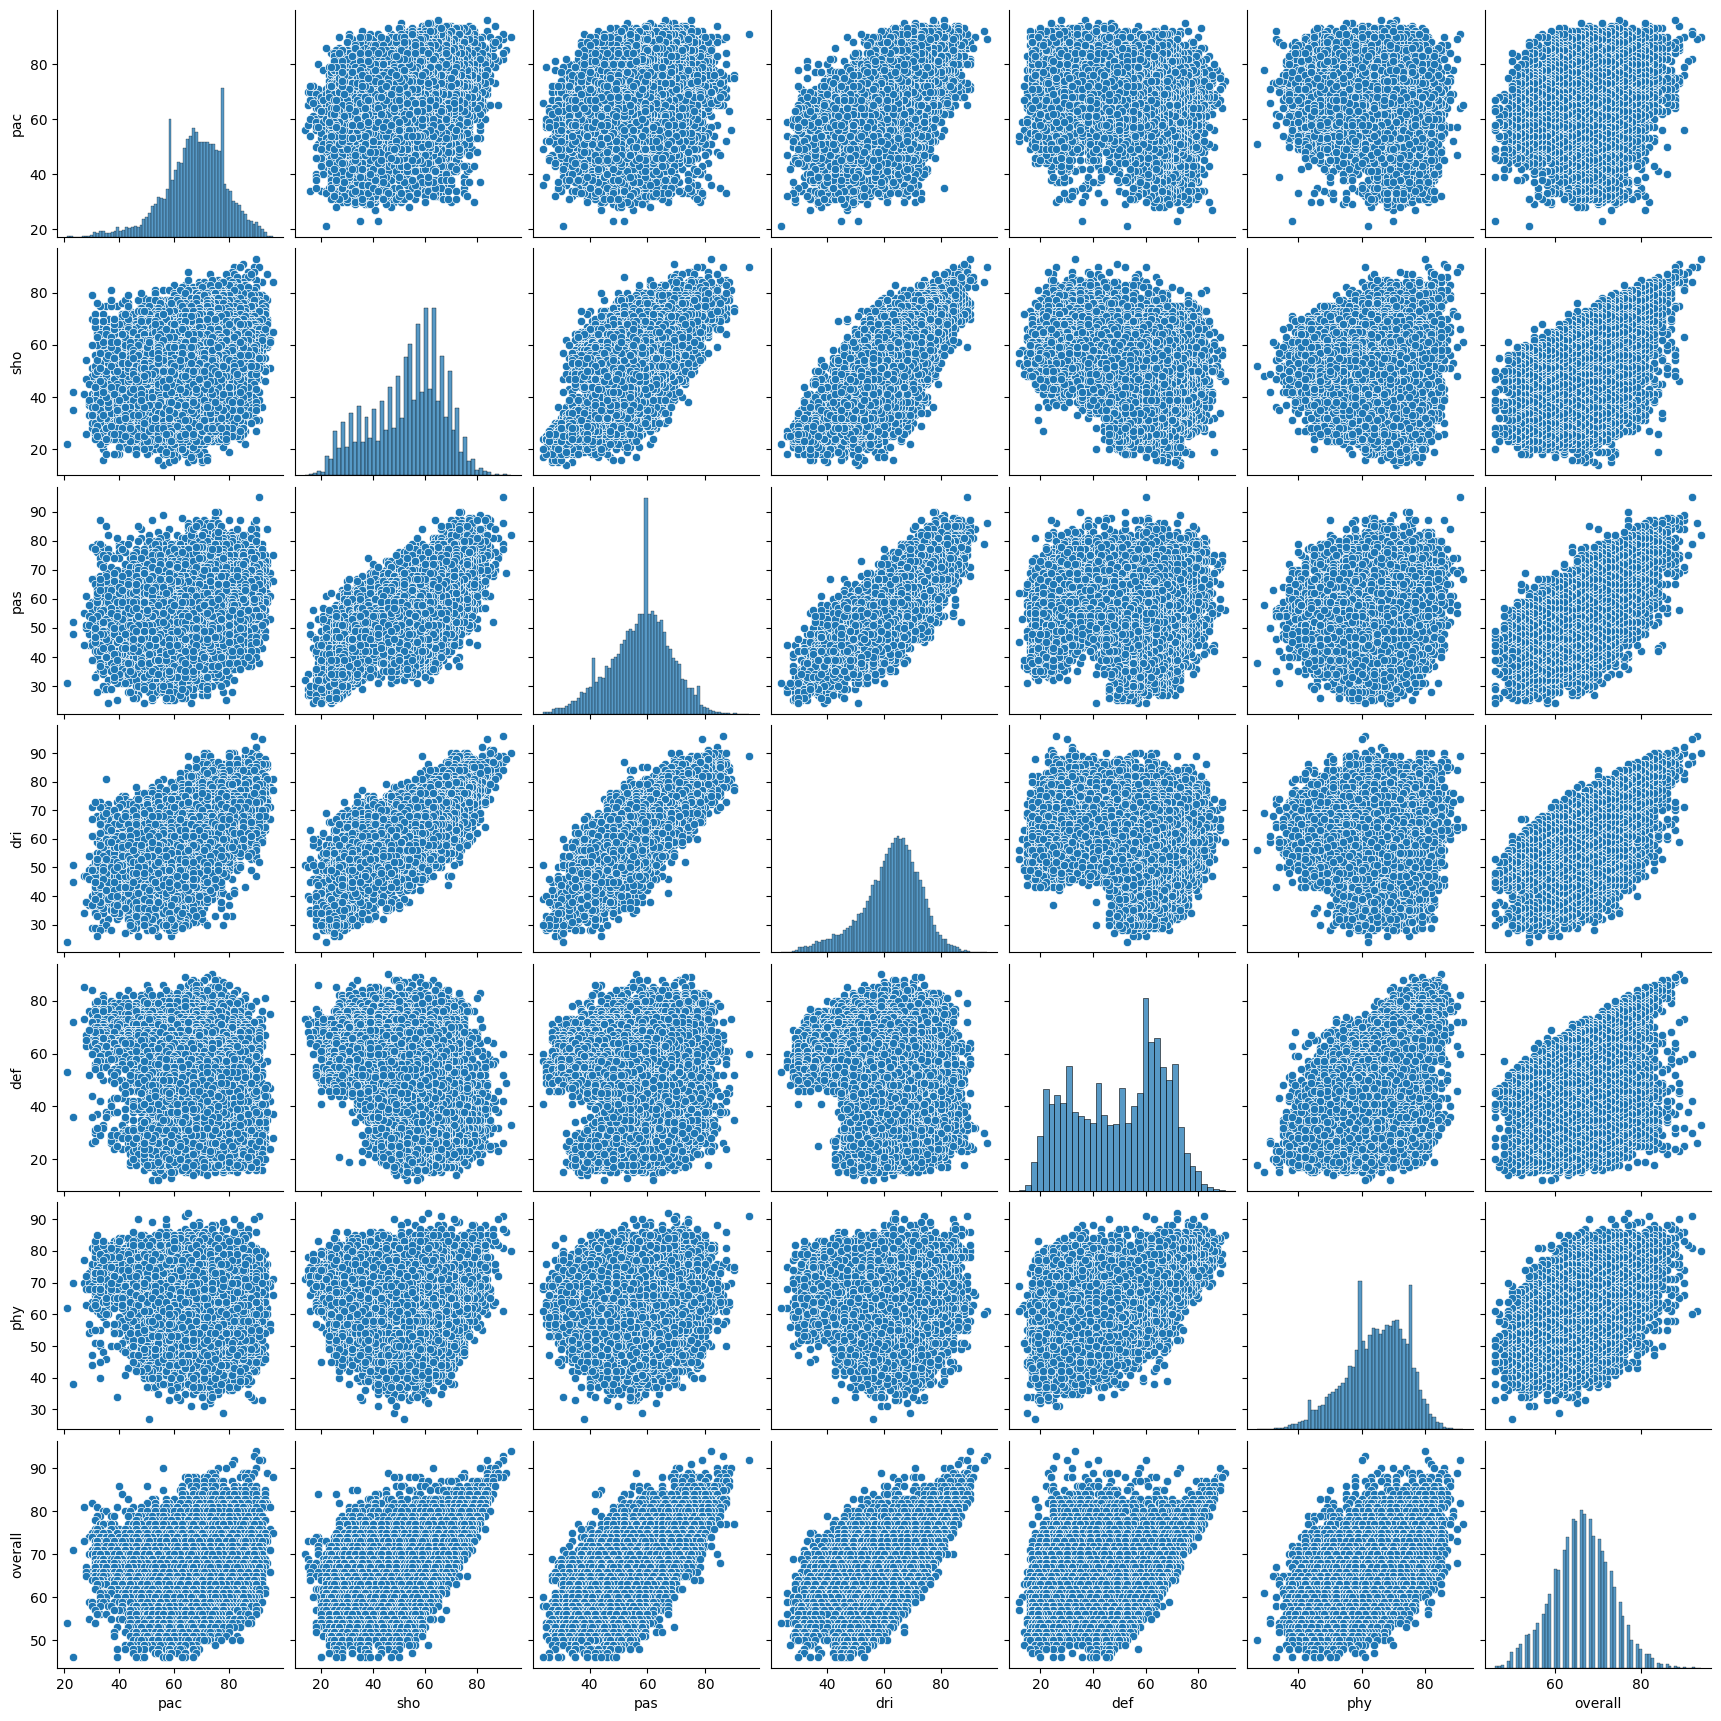

In [4]:
sns.pairplot(df, vars=['pac', 'sho', 'pas', 'dri', 'def', 'phy', 'overall'])
plt.show()

If you succeeded, you should have a big fancy plot on your screen right now. Looks pretty cool for one line of code right? So, let's break down what we can actually learn from the pairplot. 

Looking at the last row, we can see that most indepedent features seem to have a positive relationship with the 'overall' rating. Although this might not come as a surprise, we can thus hypothesize that players with higher scores on sub-categories also have a higher overall rating. 

We can also see that there does not seem to be a lot of correlation between individual independent variables. Only the dribbling skill seems to be positivily correlated with passing and shooting skills. 

In conclusion, we can assume that a linear regression model could be a good fit to our dataset. 

## Model initiation

### Assignment 3: Model construction

Time to cut to the chase and do some actual machine learning. We are going to build a regression model using a Linear Regression algorithm. To make this fun and easy, let's start with some baby steps into the world of data science

First, we will need to import the functions that we need. Everything we need is in the *sklearn* (SciKit learn) library, but as sklearn is very extensive, it makes no sense to import everything. Therefore, we will only import the stuff that we actually need. 

The general way to do this is by coding: `from *(sub-)library* import *function or class*`. In this case we will need the `LinearRegression` class from the `linear_model` sub-library of sklearn, the `train_test_split` function from the `model_selection` sub-library of sklearn, and finally the `mean_squared_error` function from the `metrics` sub-library of sklearn. In the final part of today's practical we will look into polynomial regression as well, so while we are at it also import the `PolynomialFeatures` class from the `preprocessing` sub-library of sklearn.

We will tell you what these functions do later on, but first start with importing them. If you don't know exactly how this works, you can check the code below to see what to do.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

**Define X and y**

First, we have to create an outcome or target variable called (by convention) `y`. This is the dependent variable we will predict in the regression model. To achieve this, we will extract all values of the column containing dependent variable ('overall') and put them in a variable we call y

In [6]:
y = df['overall'] # single square brackets, thus it is a pd.Series

Next, we have to create our input variable called (by convention) `X`, that is made up out of all the features or independent variables in our dataset. There are multiple ways to do this. The easiest way is by specifying all the column names of the features you want to select (remember double brackets). Declare the features to a variable called `X`. 

In [7]:
X = df[['pac', 'sho', 'pas', 'dri', 'def', 'phy']] # double square brackets, thus it is a pd.DataFrame

**'Train-Test-Split'**

Let's shortly evaluate here. After loading the data, inspecting it and selecting the `X` and `y` parts of the model, we are nearly ready to do some machine learning. Yet there is one more thing we need to do before the real magic happens. 

By now, you have probably read or heard a lot about training a model. Training a model refers to the process of fitting an algorithm (like the linear regression algorithm) to a dataset. One of the key aspects of machine learning is that after training the algorithm, you evaluate the accuracy of the algoritm on an *unseen dataset*, the test-set. 

```{note}
So no matter what kind of problem (classification or regression) you are facing, you will always need a training-dataset and a test-set. Therefore, we will be using the `train_test_split` function of sklearn. This function automatically creates a training and a test-dataset by randomly drawing samples from the data. By convention, we again have a pretty standardized way of doing this, and it is pretty much the same for all machine learning problems you will encounter in this course. 
```

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now, that works like a charm, but let's quickly brake down what we actually did based on the provided key-word arguments:

1. We provided our features (`X`) and outcome (`y`) because this is the data that needs to be split in a training- and a test set. 

2. We specified a `test_size`. This refers to the relative size of the test-dataset. In this case 0.3 means the test-dataset will contain 30% of the dataset, and the training-dataset will automatically contain 70% of the dataset. 

3. We specified a random_state. Under the hood the `train_test_split` function randomly draws from the dataset, however, by specificy a random_state we make sure that the function start at the same location every time, so that we have a constant output if we would run our code again. 

::::{important}
When you combine splitting with other function you have to think about the order execution to prevent data leakage. For instance, when you need to use a train-test split and rescale the data, what would be the right order? 

In what example is there data leakage?
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
```

or
```python
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
::::


Now execute the train_test_split function yourself using the code-example provided to you. 

### Assignment 4: Model fitting

Finally we came to the core of machine learning: fitting a model to your data. The common workflow to do this is as follows:

1. Instantiate the model function (i.e. `LinearRegression()`) and declare it a convenient variable (i.e. linreg). In this case no keyword arguments are required, but in other models you might specify arguments for the algorithm here. 

2. Fit the model to your training-data by calling the `fit()` method on linreg. As arguments you will have to specify the `X_train` and `y_train` variables. 

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train);

Now that we have a trained model, we will have to evaluate the performance of our model on the test-set. To do so, we will first predict the values in the test set by calling the `predict()` method on linreg and specifying `X_test` as an argument. What happens here is that we used the trained model to predict `y` ('overall') for every row of data in the test based on the independent variables of that row. Predict the values in the test-set and declare them to variable called `y_pred`.

In [22]:
y_pred = linreg.predict(X_test)

## Evaluate and interpret the model

### Assignment 5: Evaluating the model

Now, let's find out how well our model performs. In your statistics course, you have probably already learned about the ways to evaluate a linear regression model: you can use the $R^2$ score and the Root Mean Squared Error (RMSE). Today we will be using both of them. 

The $R^2$ score can be computed by calling the `score()` method on the fitted linreg model, specifying `X_test` and `y_test` as arguments. The outcome will be the $R^2$, do this and store the result in a variable R2. 

The RMSE can be computed using the `mean_squared_error()` function we previously imported. Specify `y_test` and `y_pred` (in that order) as arguments. The output gives us the Mean Squared Error, declare this to a variable called MSE. To get the RMSE, use the .sqrt() method in the numpy library. Store the result in a variable called RMSE. 

Now print both the $R^2$ and RMSE in your console, how well did the model perform?

In [25]:
R2 = linreg.score(X_test, y_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

#### Assignment 6: Interpreting the model

Finally, the end is near. Our model works - and after evaluation we can conclude it works reasonably well - and we have done some actual machine learning. Now let's try to derive knowledge from the model coefficients. Basically, your task is to construct the regression function we discussed earlier. 

to do so, call the `coef_` and `intercept_` attributes on linreg. What do you get?

Construct a string that represents the complete regression equation, what is the most important feature?

In [28]:
coefs = linreg.coef_
intercept = linreg.intercept_
linreg_eq = 'overall = 14.799 + 0.028*pac + 0.106*sho + 0.074*pas, 0.253*dri + 0.118*def + 0.278*phy'

## Polynomial regression

### Assignment 7: Polynomial Regression

Hopefully, you have rocked every task we have given you, and there is some time left. At the beginning we promised you Polynomial Regression, and now it is time to deliver. We have constructed a linear model that performs pretty good. However, in the real word linear relationships are as rare as unicorns, and the actual relationship we are looking for might be polynomial. 

So how do we handle this? Well, it is pretty easy to construct a polynomial regression model from the linear regression model you already know. The only thing you need is the `PolynomialFeatures` class we already imported. Before you continue, look up what the polynomial actually does, how can it capture non-linear relations? Do you change the model or the features? What does the overall function now looks like?

First, instantiate this function by calling `polynomial_2 = PolynomialFeatures(degree=2)`. This will result in the construction of a 2nd-order function (ofcourse, we could also specify degree=3 for a 3rd-order, or even degree=100 if you think that makes sense and have sufficient computing power to actually fit your data on that model).

In [29]:
polynomial_2 = PolynomialFeatures(degree=2)

Next, we are going to transform our independent variables into polynomial features. (Mind you, we have to do this for the train set **and** the test-set, but only for `X`). 

To achieve this, create a variable X_poly_train by calling `polynomial_2.fit_transform(X_train)`. Do the same for `X_test` and declare it to a variable called `X_poly_test`. 

In [30]:
X_poly_train = polynomial_2.fit_transform(X_train)
X_poly_test = polynomial_2.fit_transform(X_test)

What we did here is transform our features with a polynomial function. Now we can fit our linear regression model as if it is a polynomial model, pretty cool right? To do so, just redo step 5 - 7 in similar fashion with different variable names (as you want to compare both models in the end). Have you forgetten the steps already? I will give you a short recap:

1. instantiate a `LinearRegression()` model and declare it a variable called `linreg_poly`
2. fit linreg_poly to X_poly_train and y_train. 
3. predict y used the trained model and declare the predictions to a variable called y_pred_poly
4. compute $R^2$ and RMSE for the linreg_poly model and declare them to R2_Poly and RMSE_poly. 

In [31]:
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly_train, y_train)
y_pred_poly = linreg_poly.predict(X_poly_test)

R2_poly = linreg_poly.score(X_poly_test, y_test)
MSE_poly = mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(MSE_poly)

>**The Verdict**:
>
>Finally, it's time for the million dollar question, which model performs the best? Print the $R^2$ and RMSE Scores of both
>the linear and quadratic regression model to the console and find out for yourself. 

In [33]:
%%capture
print('Linear Regression Model: \n')
print('R^2: %f' %R2)
print('RMSE: %f' %RMSE)
print('----------')
print('Quadratic Regression Model: \n')
print('R^2: %f' %R2_poly)
print('RMSE: %f' %RMSE_poly)

## Taking the next step (bonus)

Now that you have trained simple and polynomial regression models it is time for the next step. The previous task was fairly straightforward, as our dataset only contained a limited number of features that were all linked to the outcome variable. 

However, real-life datasets often contain much more features, of which many will not neccesarily improve your model. 

Therefore, you need to be capable of selecting the most important features to find the optimal model. To achieve that, you need to know about Ridge and Lasso regression models. 

Start with reading the sklearn [documentation](https://scikit-learn.org/stable/modules/linear_model.html) to understand what the different types of regression entail: 

In [7]:
df = pd.read_csv(os.path.join(path, "Fifa_18_complete.csv"), index_col=0)

### Your task

You will have to do a similar task as in the previous task: your goal is to predict a players value ("eur_value") based on his attributes. For this task you will have to load the "FIFA_18_complete" dataset. 

Start with exploring the dataset and then prepare it for analysis. Although Lasso and Ridge Regression can be of help in case of multiple (correlating) features, your task is not as simple as merely throwing all features into a model. You will still have to select a set of features you think might work. 

Therefore, start with some EDA to check out what features would be interesting for your model. Afterwards, try training a Lasso and Ridge model using information from the sklearn documentation and the skills you have been teached in the first part of this practical.

```{note}
You are not allowed to use someone's wage or release clause, nor use preferred position variables, images of a players head or anything similar. Focus on someones performance attributes. 
```

In [37]:
df.head()
df.tail()
df.info()
df.describe()
df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17994 entries, 20801 to 238308
Columns: 184 entries, name to prefers_gk
dtypes: bool(92), float64(32), int64(47), object(13)
memory usage: 14.3+ MB


,special,age,height_cm,weight_kg,real_face,eur_value,eur_wage,eur_release_clause,overall,potential,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
special,1.000000,0.239652,-0.380680,-0.281998,0.211911,0.374652,0.366077,0.365384,0.602892,0.395498,...,-0.082802,0.142423,0.061026,NaN,NaN,NaN,NaN,NaN,NaN,-0.713369
age,0.239652,1.000000,0.076463,0.219722,0.142091,0.080431,0.150949,0.065595,0.460902,-0.223340,...,0.054940,0.014247,0.000947,NaN,NaN,NaN,NaN,NaN,NaN,0.071212
height_cm,-0.380680,0.076463,1.000000,0.766900,0.024189,0.002631,0.020784,0.001133,0.042723,0.003969,...,0.329081,-0.100800,-0.049597,NaN,NaN,NaN,NaN,NaN,NaN,0.366555
weight_kg,-0.281998,0.219722,0.766900,1.000000,0.055301,0.036923,0.059275,0.031917,0.136611,-0.012879,...,0.273953,-0.087931,-0.035901,NaN,NaN,NaN,NaN,NaN,NaN,0.343268
real_face,0.211911,0.142091,0.024189,0.055301,1.000000,0.402883,0.496536,0.404549,0.342843,0.283657,...,0.003740,-0.000070,0.020229,NaN,NaN,NaN,NaN,NaN,NaN,-0.023959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prefers_lam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prefers_lcm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prefers_ldm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prefers_lcb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X_cols = ["special", "age", "overall", "potential", "pac", 
          "sho", "pas", "dri", "def", "phy", "international_reputation", 
          "crossing", "finishing", "heading_accuracy", "short_passing", "volleys", 
          "dribbling", "curve", "free_kick_accuracy", "long_passing", "ball_control", "acceleration"]
y_col = ["eur_value"]

In [39]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso()
ridge_model = Ridge()

X = df[X_cols]
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    """ A function that calculates the R^2 and the RMSE based on a model and dataset

    Args:
        model (sklearn.Model): The used model to fit the data on
        X_train (pd.DataFrame | np.ndarray): The training features
        X_test (pd.DataFrame | np.ndarray): The test features
        y_train (pd.Series | np.ndarray): The training labels
        y_test (pd.Series | np.ndarray): The training labels

    Returns:
        tuple[float | float]: the R^2 and the RMSE on the test set

    Notes:
        This fuction assumes that the learning is a regression task.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    R2 = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    
    return R2, RMSE

lasso_R2, lasso_RMSE = train_evaluate_model(lasso_model, X_train, X_test, y_train, y_test)
ridge_R2, ridge_RMSE = train_evaluate_model(ridge_model, X_train, X_test, y_train, y_test)

After you have trained both models, evaluate their performance using R2 and RMSE, what do you find? At this point, two things could have happened (assuming you succeeded in all previous tasks). Either you are happy because of the fact that your model works, or you are unhappy because you think it can perform even better. 

To resolve the latter, you have two final tasks:
>
>1. Apply feature selection based on the feature importance. Don't remember how to do that? Check the documentation!
>2. Use the help from the documentation to play around with the model parameters and see if you can improve the models. 